In [1]:
import sys
from pathlib import Path
sys.path.append(Path("../modules/").absolute().__str__())

from data_utils import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
df = load_dataset(Path("../outputs/batch_run/experiment_basic_vs_template_8/concatened-evaluations.json"))
df.head()

,model_name,num_rows,num_gen_fail,num_exec_timeout,num_exec_fail,num_exec_empty,num_exec_to_eval,num_eval,num_eval_empty,gold_num_rows,...,get_nested_values_mean_average_precision,id_precision,id_recall,id_mean_reciprocal_rank,id_mean_average_precision,cross_precision,cross_recall,cross_mean_reciprocal_rank,cross_mean_average_precision,correct_syntax
0,Mistral-7B-Instruct-v0.2_rv32-ld0-bs1-p0-nta0-...,513,425,1,33,28,26,26,0,503,...,0.044197,0.076923,0.192308,0.089744,0.048475,0.146154,0.307692,0.308974,0.070522,0.167641
1,Mistral-7B-Instruct-v0.2_rv32-ld0-bs1-p0-nta0-...,513,33,14,24,406,36,36,0,503,...,0.035156,0.055556,0.055556,0.055556,0.055556,0.111111,0.166667,0.166667,0.072467,0.918129


In [3]:
df[['model_name', 'num_rows', 'num_gen_fail', 'num_exec_timeout',
       'num_exec_fail', 'num_exec_empty', 'num_exec_to_eval', 'num_eval',
       'num_eval_empty', 'gold_num_rows', 'gold_num_exec_timeout',
       'gold_num_exec_fail', 'gold_num_exec_empty', 'gold_num_exec_to_eval',
       'gold_num_eval_empty']]

,model_name,num_rows,num_gen_fail,num_exec_timeout,num_exec_fail,num_exec_empty,num_exec_to_eval,num_eval,num_eval_empty,gold_num_rows,gold_num_exec_timeout,gold_num_exec_fail,gold_num_exec_empty,gold_num_exec_to_eval,gold_num_eval_empty
0,Mistral-7B-Instruct-v0.2_rv32-ld0-bs1-p0-nta0-...,513,425,1,33,28,26,26,0,503,10,0,0,503,19
1,Mistral-7B-Instruct-v0.2_rv32-ld0-bs1-p0-nta0-...,513,33,14,24,406,36,36,0,503,10,0,0,503,19


In [4]:
print(df.columns)

Index(['model_name', 'num_rows', 'num_gen_fail', 'num_exec_timeout',
       'num_exec_fail', 'num_exec_empty', 'num_exec_to_eval', 'num_eval',
       'num_eval_empty', 'gold_num_rows', 'gold_num_exec_timeout',
       'gold_num_exec_fail', 'gold_num_exec_empty', 'gold_num_exec_to_eval',
       'gold_num_eval_empty', 'bleu_score', 'meteor_score', 'rouge1', 'rouge2',
       'rougeL', 'rougeLsum', 'get_nested_values_precision',
       'get_nested_values_recall', 'get_nested_values_mean_reciprocal_rank',
       'get_nested_values_mean_average_precision', 'id_precision', 'id_recall',
       'id_mean_reciprocal_rank', 'id_mean_average_precision',
       'cross_precision', 'cross_recall', 'cross_mean_reciprocal_rank',
       'cross_mean_average_precision', 'correct_syntax'],
      dtype='object')


In [5]:
model_names = df["model_name"].map(lambda x: x[x.rfind("-", 0, x.rfind('-'))+1:])
model_names

0    template-template
1       basic-template
Name: model_name, dtype: object

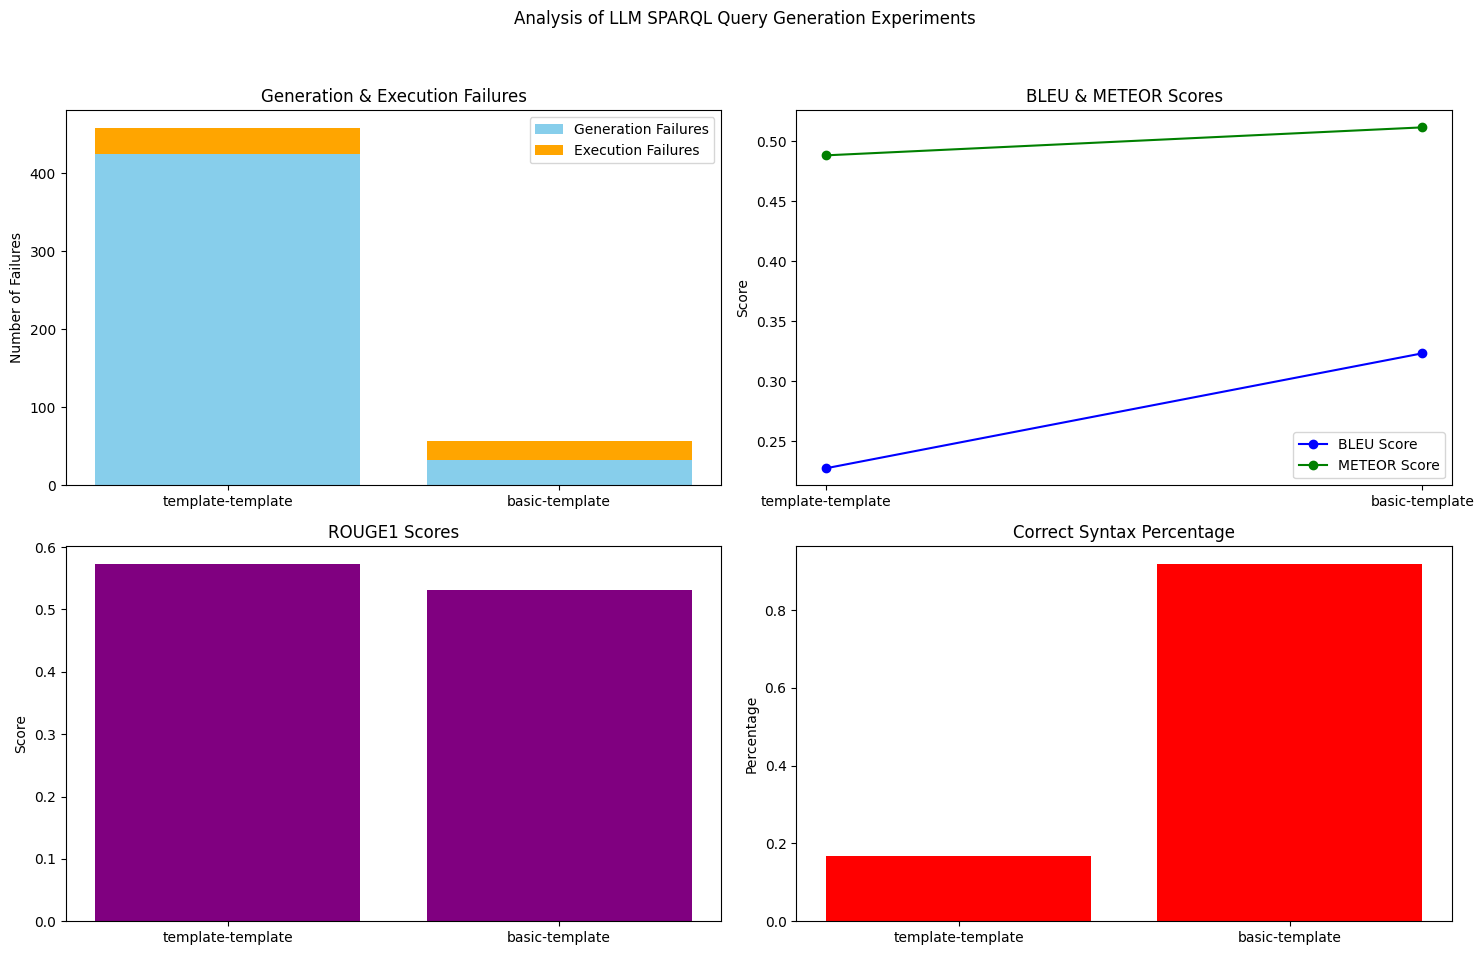

In [6]:

# Set up the matplotlib figure and axes
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Analysis of LLM SPARQL Query Generation Experiments')

# Generation and Execution Failures
axs[0, 0].bar(model_names, df["num_gen_fail"], color='skyblue', label='Generation Failures')
axs[0, 0].bar(model_names, df["num_exec_fail"], bottom=df["num_gen_fail"], color='orange', label='Execution Failures')
axs[0, 0].set_title('Generation & Execution Failures')
axs[0, 0].set_ylabel('Number of Failures')
axs[0, 0].legend()

# BLEU and METEOR Scores
axs[0, 1].plot(model_names, df["bleu_score"], marker='o', linestyle='-', color='blue', label='BLEU Score')
axs[0, 1].plot(model_names, df["meteor_score"], marker='o', linestyle='-', color='green', label='METEOR Score')
axs[0, 1].set_title('BLEU & METEOR Scores')
axs[0, 1].set_ylabel('Score')
axs[0, 1].legend()

# ROUGE1 Scores
axs[1, 0].bar(model_names, df["rouge1"], color='purple')
axs[1, 0].set_title('ROUGE1 Scores')
axs[1, 0].set_ylabel('Score')

# Correct Syntax
axs[1, 1].bar(model_names, df["correct_syntax"], color='red')
axs[1, 1].set_title('Correct Syntax Percentage')
axs[1, 1].set_ylabel('Percentage')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

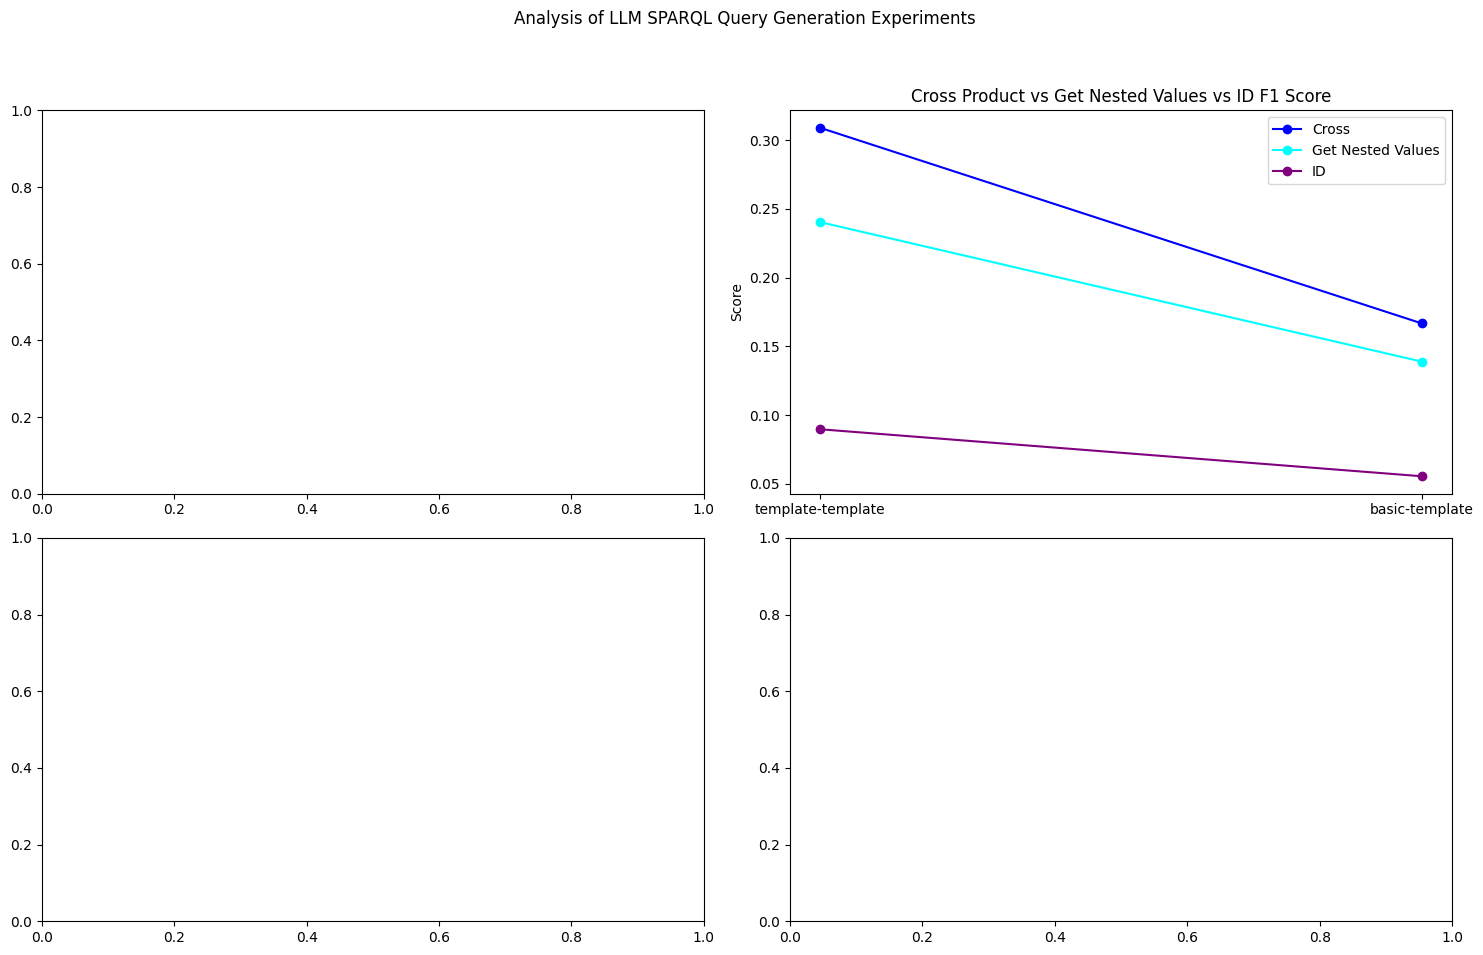

In [8]:
# Set up the matplotlib figure and axes
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Analysis of LLM SPARQL Query Generation Experiments')

# Generation and Execution Failures
# axs[0, 0].bar(model_names, df["cross_f1score"], color='skyblue', label='Generation Failures')
# axs[0, 0].bar(model_names, df["cross_f1score"], bottom=df["num_gen_fail"], color='orange', label='Execution Failures')
# axs[0, 0].set_title('Generation & Execution Failures')
# axs[0, 0].set_ylabel('Number of Failures')
# axs[0, 0].legend()

# BLEU and METEOR Scores
axs[0, 1].plot(model_names, df["cross_mean_reciprocal_rank"], marker='o', linestyle='-', color='blue', label='Cross')
axs[0, 1].plot(model_names, df["get_nested_values_mean_reciprocal_rank"], marker='o', linestyle='-', color='cyan', label='Get Nested Values')
axs[0, 1].plot(model_names, df["id_mean_reciprocal_rank"], marker='o', linestyle='-', color='purple', label='ID')
axs[0, 1].set_title('Cross Product vs Get Nested Values vs ID F1 Score')
axs[0, 1].set_ylabel('Score')
axs[0, 1].legend()

# ROUGE1 Scores
# axs[1, 0].plot(model_names, df["get_nested_values_f1score"], marker='o', linestyle='-', color='blue', label='BLEU Score')
# axs[1, 0].plot(model_names, df["get_nested_values_f1score"], marker='o', linestyle='-', color='green', label='METEOR Score')
# axs[1, 0].set_title('Cross Product F1 Score')
# axs[1, 0].set_ylabel('Score')
# axs[1, 0].legend()

# Correct Syntax
# axs[1, 1].plot(model_names, df["id_f1score"], marker='o', linestyle='-', color='blue', label='BLEU Score')
# axs[1, 1].plot(model_names, df["id_f1score"], marker='o', linestyle='-', color='green', label='METEOR Score')
# axs[1, 1].set_title('Cross Product F1 Score')
# axs[1, 1].set_ylabel('Score')
# axs[1, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [10]:
model_data = df.iloc[0]
print(model_data.model_name)

Mistral-7B-Instruct-v0.2_rv32-ld0-bs1-p0-nta0-e3-template-template


In [12]:
exec_path = Path(f'../outputs/batch_run/experiment_basic_vs_template_8/execution/{model_data.model_name}_engpeft-t0.2-topp0.95-nt1024_executed.parquet.gzip')
if not exec_path.exists():
    raise FileNotFoundError()

In [13]:
df_exec = load_dataset(exec_path)
df_exec.head()

,row,last_executed_step,to_be_executed_step,translated_prompt,status,has_error,extracted_entities,extracted_properties,linked_entities,linked_properties,output,basic_input,templated_input,target_raw,target_template,execution,executed_query
index,,,,,,,,,,,,,,,,,
895,"""Find places in America that have English name...",,LLMTranslator,,"Unexpected err.msg=""The LLM result doesn't mat...",True,None,None,None,None,None,"[""Find pairs of places in America and England ...","""Find places in America that have English name...",SELECT ?placeInAmerica ?placeInEngland ?americ...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...,exception: query is empty,None
1716,"""Find cities that have more Wikipedia sitelink...",,LLMTranslator,,"Unexpected err.msg=""The LLM result doesn't mat...",True,None,None,None,None,None,"[""Find cities that have more Wikipedia sitelin...","""Find cities that have more Wikipedia sitelink...",SELECT ?country ?countryLabel ?countrySitelink...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...,exception: query is empty,None
333,"""Write a SparQL query to retrieve the author, ...",,LLMTranslator,,"Unexpected err.msg=""The LLM result doesn't mat...",True,None,None,None,None,None,"[""Write a SparQL query to retrieve the author,...","""Write a SparQL query to retrieve the author, ...",SELECT ?author ?authorLabel ?letter ?letterLab...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...,exception: query is empty,None
1192,"""Write a SparQL query to retrieve the birth pl...",,LLMTranslator,,"Unexpected err.msg=""The LLM result doesn't mat...",True,None,None,None,None,None,"[""Write a SparQL query to retrieve the name, l...","""Write a SparQL query to retrieve the birth pl...",SELECT ?person ?personLabel ?taxon ?taxonLabel...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...,exception: query is empty,None
1518,"""Find and display the labels, locations (if av...",,LLMTranslator,,"Unexpected err.msg=""The LLM result doesn't mat...",True,None,None,None,None,None,"[""Find the SparQL query to retrieve the name, ...","""Find and display the labels, locations (if av...",SELECT ?library ?libraryLabel ?coordinate_loca...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...,exception: query is empty,None


In [14]:
def status_error_type(message:str):
    if message == "":
        return "no"
    
    if message.startswith("Unexpected err.msg=\"The LLM result doesn't match desired format.\""):
        return "NoSparqlMatch"
    
    return "other"

def find_libwikidatallm_error_proportions(df:pd.DataFrame):
    return df.status.map(status_error_type)

libwikidatallm_errors_proportions = find_libwikidatallm_error_proportions(df_exec).value_counts()
libwikidatallm_errors_proportions

status
NoSparqlMatch    425
no                88
Name: count, dtype: int64

In [22]:
row_number = 1
row = df_exec.loc[df_exec['has_error']].iloc[row_number]
answer = re.search(r"err.sparql='([\w\s\d\[\]\/\<\>\:,.\"#\\?\{\};\(\)\-*]*)'", row.status)

if answer == None or len(answer.groups()) == 0:
    print(bytes(row.status, "utf-8").decode("unicode_escape"))
    raise IndexError("No answer was found in the status.")

generated_by_llm = answer.groups()[0]
query = re.search(r"\[\/INST\] (.*)", generated_by_llm)
if query == None or len(query.groups()) == 0:
    raise IndexError("No query was found in the answer.")

query_generated = bytes(query.groups()[0], "utf-8").decode("unicode_escape")
print(query_generated)
print("-----")
print(row['target_template'])
print("-----")
print(bytes(generated_by_llm, "utf-8").decode("unicode_escape"))

PREFIX bd: <http://www.bigdata.com/rdf#>
PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wikibase: <http://wikiba.se/ontology#>

SELECT ?city ?cityLabel ?country ?countryLabel ?city_sitelinks ?country_sitelinks ?ratio
WHERE {
?city wdt:[property:instance of] wd:[entity:populated place] ;
wdt:[property:country] ?country .
?country wdt:[property:instance of] wd:[entity:country] .
OPTIONAL { ?city wdt:[property:Wikidata sitelink] ?city_sitelinks }
OPTIONAL { ?country wdt:[property:Wikidata sitelink] ?country_sitelinks }
BIND(IF(BOUND(?city_sitelinks), ?city_sitelinks, 0) AS ?city_sitelinks)
BIND(IF(BOUND(?country_sitelinks), ?country_sitelinks, 0) AS ?country_sitelinks)
BIND(IF(?city_sitelinks > ?country_sitelinks, ?city_sitelinks/?country_sitelinks, 0) AS ?ratio)
SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
ORDER BY DESC(?ratio)
LIMIT 100000000000000000000000000000000000000000000000000000000000

In [16]:
row_number = 0
row = df_exec.loc[~df_exec['has_error']].iloc[row_number]
print(row.translated_prompt)

SELECT ?candidate ?candidateLabel ?constituencyLabel ?partyLabel ?votes
WHERE {
?candidate wdt:[property:instance of] wd:[entity:human] ;
wdt:[property:position held] wd:[entity:candidate for French legislative election] ;
wdt:[property:constituency] ?constituency ;
wdt:[property:party affiliation] ?party .
?constituency wdt:[property:instance of] wd:[entity:constituency of the French National Assembly] .
?party wdt:[property:instance of] wd:[entity:political party] .
OPTIONAL { ?candidate wdt:[property:number of votes received] ?votes . }
SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}


In [17]:
df_exec.loc[~df_exec['has_error']].loc[df_exec['execution'].str.startswith(('exception'))].head()

,row,last_executed_step,to_be_executed_step,translated_prompt,status,has_error,extracted_entities,extracted_properties,linked_entities,linked_properties,output,basic_input,templated_input,target_raw,target_template,execution,executed_query
index,,,,,,,,,,,,,,,,,
2628,"""Write a SparQL query to retrieve the name, co...",SimplePlaceholderFiller,,SELECT ?candidate ?candidateLabel ?constituenc...,,False,"[human, candidate for French legislative elect...","[instance of, position held, constituency, par...","[[human, [Q5, human]], [candidate for French l...","[[instance of, [P31, instance of]], [position ...",SELECT ?candidate ?candidateLabel ?constituenc...,"[""Write a SparQL query to retrieve the name, c...","""Write a SparQL query to retrieve the name, co...",SELECT ?item ?itemLabel ?constituency ?constit...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...,exception: 400 Client Error: Bad Request for u...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...
2185,"""Write a SparQL query to retrieve the number o...",SimplePlaceholderFiller,,SELECT ?month ?gender ?count WHERE {\nSERVICE ...,,False,"[human, United Kingdom]","[instance of, date of death, sex or gender, co...","[[human, [Q5, human]], [United Kingdom, [Q145,...","[[instance of, [P31, instance of]], [date of d...",SELECT ?month ?gender ?count WHERE {\nSERVICE ...,"[""Write a SparQL query to retrieve the number ...","""Write a SparQL query to retrieve the number o...",SELECT ?deathYYYY_MM (COUNT(?gender) AS ?count...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...,exception: 400 Client Error: Bad Request for u...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...
1731,"""Write a SparQL query to find the most frequen...",SimplePlaceholderFiller,,SELECT ?property ?propertyLabel (COUNT(*) AS ?...,,False,[],[property of sense],[],"[[property of sense, [property of sense, prope...",SELECT ?property ?propertyLabel (COUNT(*) AS ?...,"[""Write a query to find the most frequently oc...","""Write a SparQL query to find the most frequen...",SELECT ?property ?propertyLabel ?count WITH {\...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...,exception: 400 Client Error: Bad Request for u...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...
1088,"""Write a SPARQL query to retrieve the name, bi...",SimplePlaceholderFiller,,SELECT ?artist ?artistLabel ?birthplaceLabel ?...,,False,[Swedish Museum of Art and Design],"[collection, place of birth, place of death, p...","[[Swedish Museum of Art and Design, [Swedish M...","[[collection, [P195, collection]], [place of b...",SELECT ?artist ?artistLabel ?birthplaceLabel ?...,"[""Write a SparQL query to retrieve the distinc...","""Write a SPARQL query to retrieve the name, bi...",select distinct ?article ?person ?personLabel ...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...,exception: 400 Client Error: Bad Request for u...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...
1825,"""Write a SparQL query to retrieve the extended...",SimplePlaceholderFiller,,SELECT ?person ?personLabel ?image WHERE {\nSE...,,False,[Kardashian family],"[family member, image]","[[Kardashian family, [Kardashian family, Karda...","[[family member, [P1038, relative]], [image, [...",SELECT ?person ?personLabel ?image WHERE {\nSE...,"[""Write a SparQL query to retrieve the extende...","""Write a SparQL query to retrieve the extended...",SELECT ?item1 ?image1 ?item1Label ?item2 ?imag...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...,exception: 400 Client Error: Bad Request for u...,PREFIX bd: <http://www.bigdata.com/rdf#>\nPREF...
